In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
import plotly.express as px
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


/kaggle/input/tech-jobs/tech_us_jobs.csv


In [2]:
df = pd.read_csv('../input/tech-jobs/tech_us_jobs.csv')
df.head(5)

,title,company,salary,summary,location,date,rating
0,Full Stack Developer (JavaScript),"Mosaic Learning, Inc.","From $75,000 a year",Job Title: Full Stack Developer (Javascript)De...,+1 locationRemote,EmployerActive 2 days ago,NaN
1,newVueJS Front-end Developer,THH LLC,"$70,000 - $105,000 a year",Proven work experience as a Front-end develope...,Remote,Posted4 days ago,4.3
2,"Front-end developer (HTML, CSS, JavaScript)",AirTight Design,"$70,000 - $100,000 a year",You will report to our lead front-end develope...,Remote,EmployerActive 3 days ago,NaN
3,newRemote Full Stack Javascript Developer,Sandbox Apps Inc.,"$44,470 - $65,000 a year",Extending the digital shopping experience from...,Remote,PostedToday,NaN
4,Web Developer / HTML,Phoenix Technology Partners,NaN,"Build applications using HTML, CSS, and JavaSc...","New York, NY",Posted30+ days ago,NaN


In [3]:
for col in df.columns:
    print(col)

title
company
salary
summary
location
date
rating


In [4]:
df.isna().sum()

title          0
company        0
salary      2691
summary        0
location       0
date           0
rating      3357
dtype: int64

In [5]:
df.shape

(6780, 7)

In [6]:
# Temporary fill
df['salary'].fillna(0, inplace =True)

In [7]:
relevant = ['salary', 'location', 'date', 'rating']
for i in relevant:
    print(i)
    print(df[i].unique())

salary
['From $75,000 a year' '$70,000 - $105,000 a year'
 '$70,000 - $100,000 a year' '$44,470 - $65,000 a year' 0
 '$100,000 - $130,000 a year' '$105,000 - $140,000 a year'
 '$11,000 - $16,000 a month' '$24 - $35 an hour'
 '$100,000 - $120,000 a year' '$32 - $35 an hour' '$80 - $100 an hour'
 '$60,000 - $90,000 a year' '$70,000 - $80,000 a year'
 '$22.50 - $37.50 an hour' '$60 - $80 an hour' '$55,000 - $60,000 a year'
 '$130,000 - $180,000 a year' '$58.75 an hour' '$50 an hour'
 '$75,000 - $95,000 a year' '$95 - $145 an hour'
 '$140,000 - $180,000 a year' '$18 - $25 an hour'
 '$50,000 - $65,000 a year' '$87,294 - $140,977 a year' '$110,000 a year'
 '$100,000 - $200,000 a year' '$88,000 - $192,000 a year'
 'From $70,000 a year' '$68,610 - $157,498 a year'
 '$96,000 - $138,000 a year' '$75,000 - $90,000 a year'
 '$120,000 - $150,000 a year' 'Up to $25 an hour' '$16 - $20 an hour'
 '$50 - $63 an hour' 'Up to $110,000 a year' '$120,000 - $160,000 a year'
 '$90,000 - $110,000 a year' '$60

In [8]:
df.dtypes

title        object
company      object
salary       object
summary      object
location     object
date         object
rating      float64
dtype: object

In [9]:
df['title'] = df['title'].astype('str') 
df.dtypes

title        object
company      object
salary       object
summary      object
location     object
date         object
rating      float64
dtype: object

The column 'title' has 'new' appended to a number of rows, which doesn't make it very readable, so we'll clean them up for now. 

In [10]:
for i in df.index:
    val = df['title'].iloc[i]
    if val[0:3] == 'new':
        df.at[i, 'title'] = df.at[i, 'title'][3:]
    else:
        pass
df.head(10)

,title,company,salary,summary,location,date,rating
0,Full Stack Developer (JavaScript),"Mosaic Learning, Inc.","From $75,000 a year",Job Title: Full Stack Developer (Javascript)De...,+1 locationRemote,EmployerActive 2 days ago,NaN
1,VueJS Front-end Developer,THH LLC,"$70,000 - $105,000 a year",Proven work experience as a Front-end develope...,Remote,Posted4 days ago,4.3
2,"Front-end developer (HTML, CSS, JavaScript)",AirTight Design,"$70,000 - $100,000 a year",You will report to our lead front-end develope...,Remote,EmployerActive 3 days ago,NaN
3,Remote Full Stack Javascript Developer,Sandbox Apps Inc.,"$44,470 - $65,000 a year",Extending the digital shopping experience from...,Remote,PostedToday,NaN
4,Web Developer / HTML,Phoenix Technology Partners,0,"Build applications using HTML, CSS, and JavaSc...","New York, NY",Posted30+ days ago,NaN
5,JavaScript Developer,X2logicsstaffingsolution,"$100,000 - $130,000 a year",Design video and voice solutions leveraging We...,"Austin, TX",PostedToday,NaN
6,REMOTE Full Stack Javascript Developer,Piper Companies,"$105,000 - $140,000 a year",The REMOTE Full Stack Javascript Developer wil...,+13 locationsRemote,Posted3 days ago,4.5
7,Frontend Developer,GRANDMETRIC,"$11,000 - $16,000 a month","Our main focus is a booking system, that allow...","Remote in Lewes, DE",Posted19 days ago,NaN
8,React JS Developer,TETCHTECH INC,$24 - $35 an hour,"Job Types: Full-time, Part-time, Contract.Part...",Remote,EmployerActive 7 days ago,NaN
9,HTML Developer,"Woongjin, Inc",0,Check the hand off for creative asset from Cli...,"Ridgefield Park, NJ",Posted2 days ago,3.6


In [11]:
df['salaries'] = None

In [12]:
index_salary = df.columns.get_loc('salary')
index_salaries= df.columns.get_loc('salaries')

In [13]:
c = ['ID','Income']
d = list(range(1, len(df)+ 1))

for row in range(0, len(df)):
    d[row] = [row, df.iat[row, index_salary]]

In [14]:
data = pd.DataFrame(d,columns=c)

**Salary**

Salary data is currently represented as text, but we'd like to have it in integer format. To compare apples to apples, we will also need to get salaries in the same period, in this case, annually. To do this, we'll create a new column to apply our criteria to.

In [15]:
# Creating a new column with integer values for the annual salary based on averages
data['Income1'] = data['Income'].astype(str).str.lower() 
data.head(10)

,ID,Income,Income1
0,0,"From $75,000 a year","from $75,000 a year"
1,1,"$70,000 - $105,000 a year","$70,000 - $105,000 a year"
2,2,"$70,000 - $100,000 a year","$70,000 - $100,000 a year"
3,3,"$44,470 - $65,000 a year","$44,470 - $65,000 a year"
4,4,0,0
5,5,"$100,000 - $130,000 a year","$100,000 - $130,000 a year"
6,6,"$105,000 - $140,000 a year","$105,000 - $140,000 a year"
7,7,"$11,000 - $16,000 a month","$11,000 - $16,000 a month"
8,8,$24 - $35 an hour,$24 - $35 an hour
9,9,0,0


In [16]:
data['Income1'].replace({'n/a' : '0', '':'0', '-':'0', 0:'0'}, regex=False, inplace=True)
data.head(10)

,ID,Income,Income1
0,0,"From $75,000 a year","from $75,000 a year"
1,1,"$70,000 - $105,000 a year","$70,000 - $105,000 a year"
2,2,"$70,000 - $100,000 a year","$70,000 - $100,000 a year"
3,3,"$44,470 - $65,000 a year","$44,470 - $65,000 a year"
4,4,0,0
5,5,"$100,000 - $130,000 a year","$100,000 - $130,000 a year"
6,6,"$105,000 - $140,000 a year","$105,000 - $140,000 a year"
7,7,"$11,000 - $16,000 a month","$11,000 - $16,000 a month"
8,8,$24 - $35 an hour,$24 - $35 an hour
9,9,0,0


In [17]:
data['Income1'].replace({np.nan: 0,'from': '', 'to': '+', '-': '+', ' a year': ''}, regex=True, inplace=True)
data.head(10)

,ID,Income,Income1
0,0,"From $75,000 a year","$75,000"
1,1,"$70,000 - $105,000 a year","$70,000 + $105,000"
2,2,"$70,000 - $100,000 a year","$70,000 + $100,000"
3,3,"$44,470 - $65,000 a year","$44,470 + $65,000"
4,4,0,0
5,5,"$100,000 - $130,000 a year","$100,000 + $130,000"
6,6,"$105,000 - $140,000 a year","$105,000 + $140,000"
7,7,"$11,000 - $16,000 a month","$11,000 + $16,000 a month"
8,8,$24 - $35 an hour,$24 + $35 an hour
9,9,0,0


In [18]:
data['Income1'].replace(' an hour', ' * 40 * 52', regex=True, inplace=True)
data.head(10)

,ID,Income,Income1
0,0,"From $75,000 a year","$75,000"
1,1,"$70,000 - $105,000 a year","$70,000 + $105,000"
2,2,"$70,000 - $100,000 a year","$70,000 + $100,000"
3,3,"$44,470 - $65,000 a year","$44,470 + $65,000"
4,4,0,0
5,5,"$100,000 - $130,000 a year","$100,000 + $130,000"
6,6,"$105,000 - $140,000 a year","$105,000 + $140,000"
7,7,"$11,000 - $16,000 a month","$11,000 + $16,000 a month"
8,8,$24 - $35 an hour,$24 + $35 * 40 * 52
9,9,0,0


In [19]:
data['Income1'].replace(' a month', ' * 12', regex=True, inplace=True)
data.head(10)

,ID,Income,Income1
0,0,"From $75,000 a year","$75,000"
1,1,"$70,000 - $105,000 a year","$70,000 + $105,000"
2,2,"$70,000 - $100,000 a year","$70,000 + $100,000"
3,3,"$44,470 - $65,000 a year","$44,470 + $65,000"
4,4,0,0
5,5,"$100,000 - $130,000 a year","$100,000 + $130,000"
6,6,"$105,000 - $140,000 a year","$105,000 + $140,000"
7,7,"$11,000 - $16,000 a month","$11,000 + $16,000 * 12"
8,8,$24 - $35 an hour,$24 + $35 * 40 * 52
9,9,0,0


In [20]:
data.loc[data.astype(str).Income1.str.contains('\+'),'Income1'] = '(' + data['Income1'].astype(str) + ') / 2'
data.head(10)

,ID,Income,Income1
0,0,"From $75,000 a year","$75,000"
1,1,"$70,000 - $105,000 a year","($70,000 + $105,000) / 2"
2,2,"$70,000 - $100,000 a year","($70,000 + $100,000) / 2"
3,3,"$44,470 - $65,000 a year","($44,470 + $65,000) / 2"
4,4,0,0
5,5,"$100,000 - $130,000 a year","($100,000 + $130,000) / 2"
6,6,"$105,000 - $140,000 a year","($105,000 + $140,000) / 2"
7,7,"$11,000 - $16,000 a month","($11,000 + $16,000 * 12) / 2"
8,8,$24 - $35 an hour,($24 + $35 * 40 * 52) / 2
9,9,0,0


In [21]:
data['Income1'] = data['Income1'].str.replace('$', '')
data.head(10)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


,ID,Income,Income1
0,0,"From $75,000 a year","75,000"
1,1,"$70,000 - $105,000 a year","(70,000 + 105,000) / 2"
2,2,"$70,000 - $100,000 a year","(70,000 + 100,000) / 2"
3,3,"$44,470 - $65,000 a year","(44,470 + 65,000) / 2"
4,4,0,0
5,5,"$100,000 - $130,000 a year","(100,000 + 130,000) / 2"
6,6,"$105,000 - $140,000 a year","(105,000 + 140,000) / 2"
7,7,"$11,000 - $16,000 a month","(11,000 + 16,000 * 12) / 2"
8,8,$24 - $35 an hour,(24 + 35 * 40 * 52) / 2
9,9,0,0


In [22]:
data['Income1'] = data['Income1'].str.replace(',', '')
data.head(10)

,ID,Income,Income1
0,0,"From $75,000 a year",75000
1,1,"$70,000 - $105,000 a year",(70000 + 105000) / 2
2,2,"$70,000 - $100,000 a year",(70000 + 100000) / 2
3,3,"$44,470 - $65,000 a year",(44470 + 65000) / 2
4,4,0,0
5,5,"$100,000 - $130,000 a year",(100000 + 130000) / 2
6,6,"$105,000 - $140,000 a year",(105000 + 140000) / 2
7,7,"$11,000 - $16,000 a month",(11000 + 16000 * 12) / 2
8,8,$24 - $35 an hour,(24 + 35 * 40 * 52) / 2
9,9,0,0


In [23]:
data['Income1'] = data['Income1'].astype(str)
data.head(10)

,ID,Income,Income1
0,0,"From $75,000 a year",75000
1,1,"$70,000 - $105,000 a year",(70000 + 105000) / 2
2,2,"$70,000 - $100,000 a year",(70000 + 100000) / 2
3,3,"$44,470 - $65,000 a year",(44470 + 65000) / 2
4,4,0,0
5,5,"$100,000 - $130,000 a year",(100000 + 130000) / 2
6,6,"$105,000 - $140,000 a year",(105000 + 140000) / 2
7,7,"$11,000 - $16,000 a month",(11000 + 16000 * 12) / 2
8,8,$24 - $35 an hour,(24 + 35 * 40 * 52) / 2
9,9,0,0


In [24]:
data['Income1'].replace(' a week', '* 52', regex=True, inplace=True)
data.head(10)

,ID,Income,Income1
0,0,"From $75,000 a year",75000
1,1,"$70,000 - $105,000 a year",(70000 + 105000) / 2
2,2,"$70,000 - $100,000 a year",(70000 + 100000) / 2
3,3,"$44,470 - $65,000 a year",(44470 + 65000) / 2
4,4,0,0
5,5,"$100,000 - $130,000 a year",(100000 + 130000) / 2
6,6,"$105,000 - $140,000 a year",(105000 + 140000) / 2
7,7,"$11,000 - $16,000 a month",(11000 + 16000 * 12) / 2
8,8,$24 - $35 an hour,(24 + 35 * 40 * 52) / 2
9,9,0,0


In [25]:
data['Income1'] = data['Income1'].str.replace('up', '')
data.head(10)

,ID,Income,Income1
0,0,"From $75,000 a year",75000
1,1,"$70,000 - $105,000 a year",(70000 + 105000) / 2
2,2,"$70,000 - $100,000 a year",(70000 + 100000) / 2
3,3,"$44,470 - $65,000 a year",(44470 + 65000) / 2
4,4,0,0
5,5,"$100,000 - $130,000 a year",(100000 + 130000) / 2
6,6,"$105,000 - $140,000 a year",(105000 + 140000) / 2
7,7,"$11,000 - $16,000 a month",(11000 + 16000 * 12) / 2
8,8,$24 - $35 an hour,(24 + 35 * 40 * 52) / 2
9,9,0,0


In [26]:
data['Income1'] = data['Income1'].apply(lambda x: eval(x) if (pd.notnull(x)) else x)
data.head(10)

,ID,Income,Income1
0,0,"From $75,000 a year",75000.0
1,1,"$70,000 - $105,000 a year",87500.0
2,2,"$70,000 - $100,000 a year",85000.0
3,3,"$44,470 - $65,000 a year",54735.0
4,4,0,0.0
5,5,"$100,000 - $130,000 a year",115000.0
6,6,"$105,000 - $140,000 a year",122500.0
7,7,"$11,000 - $16,000 a month",101500.0
8,8,$24 - $35 an hour,36412.0
9,9,0,0.0


In [27]:
data.head(50)

,ID,Income,Income1
0,0,"From $75,000 a year",75000.0
1,1,"$70,000 - $105,000 a year",87500.0
2,2,"$70,000 - $100,000 a year",85000.0
3,3,"$44,470 - $65,000 a year",54735.0
4,4,0,0.0
5,5,"$100,000 - $130,000 a year",115000.0
6,6,"$105,000 - $140,000 a year",122500.0
7,7,"$11,000 - $16,000 a month",101500.0
8,8,$24 - $35 an hour,36412.0
9,9,0,0.0


In [28]:
states = [ 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
           'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
           'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
           'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
           'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
locations = df['location']
locations.head(10)

0      +1 locationRemote
1                 Remote
2                 Remote
3                 Remote
4           New York, NY
5             Austin, TX
6    +13 locationsRemote
7    Remote in Lewes, DE
8                 Remote
9    Ridgefield Park, NJ
Name: location, dtype: object

In [29]:
# Dictionary of US states will allow us to clean the 'location' column for new features
def us_state(x):
    states = [ 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
           'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
           'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
           'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
           'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY', 'Remote']
    for i in states:
        if i in x:
            return i


df['location'] = df['location'].apply(us_state)
df.head(10)

,title,company,salary,summary,location,date,rating,salaries
0,Full Stack Developer (JavaScript),"Mosaic Learning, Inc.","From $75,000 a year",Job Title: Full Stack Developer (Javascript)De...,Remote,EmployerActive 2 days ago,NaN,None
1,VueJS Front-end Developer,THH LLC,"$70,000 - $105,000 a year",Proven work experience as a Front-end develope...,Remote,Posted4 days ago,4.3,None
2,"Front-end developer (HTML, CSS, JavaScript)",AirTight Design,"$70,000 - $100,000 a year",You will report to our lead front-end develope...,Remote,EmployerActive 3 days ago,NaN,None
3,Remote Full Stack Javascript Developer,Sandbox Apps Inc.,"$44,470 - $65,000 a year",Extending the digital shopping experience from...,Remote,PostedToday,NaN,None
4,Web Developer / HTML,Phoenix Technology Partners,0,"Build applications using HTML, CSS, and JavaSc...",NY,Posted30+ days ago,NaN,None
5,JavaScript Developer,X2logicsstaffingsolution,"$100,000 - $130,000 a year",Design video and voice solutions leveraging We...,TX,PostedToday,NaN,None
6,REMOTE Full Stack Javascript Developer,Piper Companies,"$105,000 - $140,000 a year",The REMOTE Full Stack Javascript Developer wil...,Remote,Posted3 days ago,4.5,None
7,Frontend Developer,GRANDMETRIC,"$11,000 - $16,000 a month","Our main focus is a booking system, that allow...",DE,Posted19 days ago,NaN,None
8,React JS Developer,TETCHTECH INC,$24 - $35 an hour,"Job Types: Full-time, Part-time, Contract.Part...",Remote,EmployerActive 7 days ago,NaN,None
9,HTML Developer,"Woongjin, Inc",0,Check the hand off for creative asset from Cli...,NJ,Posted2 days ago,3.6,None


In [30]:
df['location'].value_counts()

Remote    2590
CA         819
NY         376
TX         354
WA         287
NJ         266
IL         208
GA         188
DC         164
OR         136
MD         119
FL         118
NC          96
MA          83
MN          72
CT          71
DE          65
AL          63
ID          60
RI          58
IA          56
TN          55
NM          53
VA          51
UT          28
OK          25
CO          23
IN          16
PA          15
MI          14
OH          13
VT           9
AK           8
AZ           6
WI           5
ME           3
LA           2
KS           1
MO           1
KY           1
Name: location, dtype: int64

<AxesSubplot:>

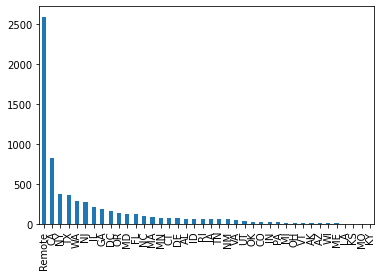

In [31]:
df['location'].value_counts().plot(kind='bar')

It appears that many positions are currently remote (unsurprisingly), and that the most frequent states in our data are California, New York, and Texas.

In [32]:
pd.set_option("display.max_rows", None)

In [33]:
dups = df.groupby(df.columns.tolist()).size().reset_index().rename(columns={0:'count'})
dups['count'].sum() - dups.shape[0]

0

In [34]:
df.groupby(df.columns.tolist(),as_index=False).size()

,title,company,salary,summary,location,date,rating,salaries,size


In [35]:
data.head(10)

,ID,Income,Income1
0,0,"From $75,000 a year",75000.0
1,1,"$70,000 - $105,000 a year",87500.0
2,2,"$70,000 - $100,000 a year",85000.0
3,3,"$44,470 - $65,000 a year",54735.0
4,4,0,0.0
5,5,"$100,000 - $130,000 a year",115000.0
6,6,"$105,000 - $140,000 a year",122500.0
7,7,"$11,000 - $16,000 a month",101500.0
8,8,$24 - $35 an hour,36412.0
9,9,0,0.0


In [36]:
mean_value=df['rating'].mean()
print(mean_value)

3.8894536955887364


In [37]:
# Filling in the rating column missing values using average rating
df['rating'].fillna(value=df['rating'].mean(), inplace=True)
df.head(10)

,title,company,salary,summary,location,date,rating,salaries
0,Full Stack Developer (JavaScript),"Mosaic Learning, Inc.","From $75,000 a year",Job Title: Full Stack Developer (Javascript)De...,Remote,EmployerActive 2 days ago,3.889454,None
1,VueJS Front-end Developer,THH LLC,"$70,000 - $105,000 a year",Proven work experience as a Front-end develope...,Remote,Posted4 days ago,4.300000,None
2,"Front-end developer (HTML, CSS, JavaScript)",AirTight Design,"$70,000 - $100,000 a year",You will report to our lead front-end develope...,Remote,EmployerActive 3 days ago,3.889454,None
3,Remote Full Stack Javascript Developer,Sandbox Apps Inc.,"$44,470 - $65,000 a year",Extending the digital shopping experience from...,Remote,PostedToday,3.889454,None
4,Web Developer / HTML,Phoenix Technology Partners,0,"Build applications using HTML, CSS, and JavaSc...",NY,Posted30+ days ago,3.889454,None
5,JavaScript Developer,X2logicsstaffingsolution,"$100,000 - $130,000 a year",Design video and voice solutions leveraging We...,TX,PostedToday,3.889454,None
6,REMOTE Full Stack Javascript Developer,Piper Companies,"$105,000 - $140,000 a year",The REMOTE Full Stack Javascript Developer wil...,Remote,Posted3 days ago,4.500000,None
7,Frontend Developer,GRANDMETRIC,"$11,000 - $16,000 a month","Our main focus is a booking system, that allow...",DE,Posted19 days ago,3.889454,None
8,React JS Developer,TETCHTECH INC,$24 - $35 an hour,"Job Types: Full-time, Part-time, Contract.Part...",Remote,EmployerActive 7 days ago,3.889454,None
9,HTML Developer,"Woongjin, Inc",0,Check the hand off for creative asset from Cli...,NJ,Posted2 days ago,3.600000,None


In [38]:
df['salary'] = data['Income1']
df.head(10)

,title,company,salary,summary,location,date,rating,salaries
0,Full Stack Developer (JavaScript),"Mosaic Learning, Inc.",75000.0,Job Title: Full Stack Developer (Javascript)De...,Remote,EmployerActive 2 days ago,3.889454,None
1,VueJS Front-end Developer,THH LLC,87500.0,Proven work experience as a Front-end develope...,Remote,Posted4 days ago,4.300000,None
2,"Front-end developer (HTML, CSS, JavaScript)",AirTight Design,85000.0,You will report to our lead front-end develope...,Remote,EmployerActive 3 days ago,3.889454,None
3,Remote Full Stack Javascript Developer,Sandbox Apps Inc.,54735.0,Extending the digital shopping experience from...,Remote,PostedToday,3.889454,None
4,Web Developer / HTML,Phoenix Technology Partners,0.0,"Build applications using HTML, CSS, and JavaSc...",NY,Posted30+ days ago,3.889454,None
5,JavaScript Developer,X2logicsstaffingsolution,115000.0,Design video and voice solutions leveraging We...,TX,PostedToday,3.889454,None
6,REMOTE Full Stack Javascript Developer,Piper Companies,122500.0,The REMOTE Full Stack Javascript Developer wil...,Remote,Posted3 days ago,4.500000,None
7,Frontend Developer,GRANDMETRIC,101500.0,"Our main focus is a booking system, that allow...",DE,Posted19 days ago,3.889454,None
8,React JS Developer,TETCHTECH INC,36412.0,"Job Types: Full-time, Part-time, Contract.Part...",Remote,EmployerActive 7 days ago,3.889454,None
9,HTML Developer,"Woongjin, Inc",0.0,Check the hand off for creative asset from Cli...,NJ,Posted2 days ago,3.600000,None


In [39]:
import re
a = 'lkdfhisoe78347834 (())&/&745  '
result = re.sub('[^0-9]','', a)
print(result)

78347834745


In [40]:
# Filling in the date column
df['rating'].replace('', np.nan, regex=True, inplace=True)
df.head(10)

,title,company,salary,summary,location,date,rating,salaries
0,Full Stack Developer (JavaScript),"Mosaic Learning, Inc.",75000.0,Job Title: Full Stack Developer (Javascript)De...,Remote,EmployerActive 2 days ago,3.889454,None
1,VueJS Front-end Developer,THH LLC,87500.0,Proven work experience as a Front-end develope...,Remote,Posted4 days ago,4.300000,None
2,"Front-end developer (HTML, CSS, JavaScript)",AirTight Design,85000.0,You will report to our lead front-end develope...,Remote,EmployerActive 3 days ago,3.889454,None
3,Remote Full Stack Javascript Developer,Sandbox Apps Inc.,54735.0,Extending the digital shopping experience from...,Remote,PostedToday,3.889454,None
4,Web Developer / HTML,Phoenix Technology Partners,0.0,"Build applications using HTML, CSS, and JavaSc...",NY,Posted30+ days ago,3.889454,None
5,JavaScript Developer,X2logicsstaffingsolution,115000.0,Design video and voice solutions leveraging We...,TX,PostedToday,3.889454,None
6,REMOTE Full Stack Javascript Developer,Piper Companies,122500.0,The REMOTE Full Stack Javascript Developer wil...,Remote,Posted3 days ago,4.500000,None
7,Frontend Developer,GRANDMETRIC,101500.0,"Our main focus is a booking system, that allow...",DE,Posted19 days ago,3.889454,None
8,React JS Developer,TETCHTECH INC,36412.0,"Job Types: Full-time, Part-time, Contract.Part...",Remote,EmployerActive 7 days ago,3.889454,None
9,HTML Developer,"Woongjin, Inc",0.0,Check the hand off for creative asset from Cli...,NJ,Posted2 days ago,3.600000,None


In [41]:
def clean_rating(x):
    return re.sub('[^0-9]','', x)
# Remove non numeric strings from rating
df['date'] = df['date'].apply(clean_rating)
df.head(10)

,title,company,salary,summary,location,date,rating,salaries
0,Full Stack Developer (JavaScript),"Mosaic Learning, Inc.",75000.0,Job Title: Full Stack Developer (Javascript)De...,Remote,2,3.889454,None
1,VueJS Front-end Developer,THH LLC,87500.0,Proven work experience as a Front-end develope...,Remote,4,4.300000,None
2,"Front-end developer (HTML, CSS, JavaScript)",AirTight Design,85000.0,You will report to our lead front-end develope...,Remote,3,3.889454,None
3,Remote Full Stack Javascript Developer,Sandbox Apps Inc.,54735.0,Extending the digital shopping experience from...,Remote,,3.889454,None
4,Web Developer / HTML,Phoenix Technology Partners,0.0,"Build applications using HTML, CSS, and JavaSc...",NY,30,3.889454,None
5,JavaScript Developer,X2logicsstaffingsolution,115000.0,Design video and voice solutions leveraging We...,TX,,3.889454,None
6,REMOTE Full Stack Javascript Developer,Piper Companies,122500.0,The REMOTE Full Stack Javascript Developer wil...,Remote,3,4.500000,None
7,Frontend Developer,GRANDMETRIC,101500.0,"Our main focus is a booking system, that allow...",DE,19,3.889454,None
8,React JS Developer,TETCHTECH INC,36412.0,"Job Types: Full-time, Part-time, Contract.Part...",Remote,7,3.889454,None
9,HTML Developer,"Woongjin, Inc",0.0,Check the hand off for creative asset from Cli...,NJ,2,3.600000,None


In [42]:
def sort_state(x):
    small_states = ['UT', 'OK', 'CO', 'IN', 'PA', 'MI', 'OH', 'VT', 'AK', 'AZ', 'WI', 'ME', 'LA', 'KS', 'MO', 'KY']
    if x in small_states:
        return 'Other'
    else:
        return x

df['location'] = df['location'].apply(sort_state)

In [43]:
col_location_list = df['location'].tolist()
col_location_list = list(set(col_location_list))
print(col_location_list)

['TN', 'MN', 'Other', 'NY', 'DC', 'FL', 'NJ', 'ID', 'WA', 'Remote', 'IL', 'MA', 'RI', 'CA', 'MD', 'AL', 'GA', 'IA', 'VA', 'NM', 'OR', None, 'TX', 'CT', 'DE', 'NC']


In [44]:
df["date"] = pd.to_numeric(df["date"])
mean_date=df['date'].mean()
print(mean_date) # 10.53

12.14241202346041


In [45]:
from sklearn.preprocessing import OneHotEncoder 

In [46]:
dict = {'': mean_value}
df['date'].replace('', mean_date, inplace=True)
df.head(10)

,title,company,salary,summary,location,date,rating,salaries
0,Full Stack Developer (JavaScript),"Mosaic Learning, Inc.",75000.0,Job Title: Full Stack Developer (Javascript)De...,Remote,2.0,3.889454,None
1,VueJS Front-end Developer,THH LLC,87500.0,Proven work experience as a Front-end develope...,Remote,4.0,4.300000,None
2,"Front-end developer (HTML, CSS, JavaScript)",AirTight Design,85000.0,You will report to our lead front-end develope...,Remote,3.0,3.889454,None
3,Remote Full Stack Javascript Developer,Sandbox Apps Inc.,54735.0,Extending the digital shopping experience from...,Remote,NaN,3.889454,None
4,Web Developer / HTML,Phoenix Technology Partners,0.0,"Build applications using HTML, CSS, and JavaSc...",NY,30.0,3.889454,None
5,JavaScript Developer,X2logicsstaffingsolution,115000.0,Design video and voice solutions leveraging We...,TX,NaN,3.889454,None
6,REMOTE Full Stack Javascript Developer,Piper Companies,122500.0,The REMOTE Full Stack Javascript Developer wil...,Remote,3.0,4.500000,None
7,Frontend Developer,GRANDMETRIC,101500.0,"Our main focus is a booking system, that allow...",DE,19.0,3.889454,None
8,React JS Developer,TETCHTECH INC,36412.0,"Job Types: Full-time, Part-time, Contract.Part...",Remote,7.0,3.889454,None
9,HTML Developer,"Woongjin, Inc",0.0,Check the hand off for creative asset from Cli...,NJ,2.0,3.600000,None


In [47]:
df = df.replace(0, np.NaN)
df.head(10)

,title,company,salary,summary,location,date,rating,salaries
0,Full Stack Developer (JavaScript),"Mosaic Learning, Inc.",75000.0,Job Title: Full Stack Developer (Javascript)De...,Remote,2.0,3.889454,None
1,VueJS Front-end Developer,THH LLC,87500.0,Proven work experience as a Front-end develope...,Remote,4.0,4.300000,None
2,"Front-end developer (HTML, CSS, JavaScript)",AirTight Design,85000.0,You will report to our lead front-end develope...,Remote,3.0,3.889454,None
3,Remote Full Stack Javascript Developer,Sandbox Apps Inc.,54735.0,Extending the digital shopping experience from...,Remote,NaN,3.889454,None
4,Web Developer / HTML,Phoenix Technology Partners,NaN,"Build applications using HTML, CSS, and JavaSc...",NY,30.0,3.889454,None
5,JavaScript Developer,X2logicsstaffingsolution,115000.0,Design video and voice solutions leveraging We...,TX,NaN,3.889454,None
6,REMOTE Full Stack Javascript Developer,Piper Companies,122500.0,The REMOTE Full Stack Javascript Developer wil...,Remote,3.0,4.500000,None
7,Frontend Developer,GRANDMETRIC,101500.0,"Our main focus is a booking system, that allow...",DE,19.0,3.889454,None
8,React JS Developer,TETCHTECH INC,36412.0,"Job Types: Full-time, Part-time, Contract.Part...",Remote,7.0,3.889454,None
9,HTML Developer,"Woongjin, Inc",NaN,Check the hand off for creative asset from Cli...,NJ,2.0,3.600000,None


In [48]:
# Replace missing salaries with mean
mean_salary = df['salary'].mean()
df['salary'].replace(np.NaN, mean_salary, inplace=True)
df.head(10)

,title,company,salary,summary,location,date,rating,salaries
0,Full Stack Developer (JavaScript),"Mosaic Learning, Inc.",75000.000000,Job Title: Full Stack Developer (Javascript)De...,Remote,2.0,3.889454,None
1,VueJS Front-end Developer,THH LLC,87500.000000,Proven work experience as a Front-end develope...,Remote,4.0,4.300000,None
2,"Front-end developer (HTML, CSS, JavaScript)",AirTight Design,85000.000000,You will report to our lead front-end develope...,Remote,3.0,3.889454,None
3,Remote Full Stack Javascript Developer,Sandbox Apps Inc.,54735.000000,Extending the digital shopping experience from...,Remote,NaN,3.889454,None
4,Web Developer / HTML,Phoenix Technology Partners,93620.280921,"Build applications using HTML, CSS, and JavaSc...",NY,30.0,3.889454,None
5,JavaScript Developer,X2logicsstaffingsolution,115000.000000,Design video and voice solutions leveraging We...,TX,NaN,3.889454,None
6,REMOTE Full Stack Javascript Developer,Piper Companies,122500.000000,The REMOTE Full Stack Javascript Developer wil...,Remote,3.0,4.500000,None
7,Frontend Developer,GRANDMETRIC,101500.000000,"Our main focus is a booking system, that allow...",DE,19.0,3.889454,None
8,React JS Developer,TETCHTECH INC,36412.000000,"Job Types: Full-time, Part-time, Contract.Part...",Remote,7.0,3.889454,None
9,HTML Developer,"Woongjin, Inc",93620.280921,Check the hand off for creative asset from Cli...,NJ,2.0,3.600000,None


In [49]:
labels = pd.DataFrame({
    'label': col_location_list
})
X = labels['label'].values.reshape(-1, 1)
enc = OneHotEncoder().fit(X)

X = enc.transform(X).toarray()
#print(X)

X = enc.inverse_transform(X)
print(X)

[['TN']
 ['MN']
 ['Other']
 ['NY']
 ['DC']
 ['FL']
 ['NJ']
 ['ID']
 ['WA']
 ['Remote']
 ['IL']
 ['MA']
 ['RI']
 ['CA']
 ['MD']
 ['AL']
 ['GA']
 ['IA']
 ['VA']
 ['NM']
 ['OR']
 [None]
 ['TX']
 ['CT']
 ['DE']
 ['NC']]


In [50]:
Y = pd.get_dummies(df['location'])
df = pd.merge(
    left=df,
    right=Y,
    left_index=True,
    right_index=True,
)
df.head(10)

,title,company,salary,summary,location,date,rating,salaries,AL,CA,...,NM,NY,OR,Other,RI,Remote,TN,TX,VA,WA
0,Full Stack Developer (JavaScript),"Mosaic Learning, Inc.",75000.000000,Job Title: Full Stack Developer (Javascript)De...,Remote,2.0,3.889454,None,0,0,...,0,0,0,0,0,1,0,0,0,0
1,VueJS Front-end Developer,THH LLC,87500.000000,Proven work experience as a Front-end develope...,Remote,4.0,4.300000,None,0,0,...,0,0,0,0,0,1,0,0,0,0
2,"Front-end developer (HTML, CSS, JavaScript)",AirTight Design,85000.000000,You will report to our lead front-end develope...,Remote,3.0,3.889454,None,0,0,...,0,0,0,0,0,1,0,0,0,0
3,Remote Full Stack Javascript Developer,Sandbox Apps Inc.,54735.000000,Extending the digital shopping experience from...,Remote,NaN,3.889454,None,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Web Developer / HTML,Phoenix Technology Partners,93620.280921,"Build applications using HTML, CSS, and JavaSc...",NY,30.0,3.889454,None,0,0,...,0,1,0,0,0,0,0,0,0,0
5,JavaScript Developer,X2logicsstaffingsolution,115000.000000,Design video and voice solutions leveraging We...,TX,NaN,3.889454,None,0,0,...,0,0,0,0,0,0,0,1,0,0
6,REMOTE Full Stack Javascript Developer,Piper Companies,122500.000000,The REMOTE Full Stack Javascript Developer wil...,Remote,3.0,4.500000,None,0,0,...,0,0,0,0,0,1,0,0,0,0
7,Frontend Developer,GRANDMETRIC,101500.000000,"Our main focus is a booking system, that allow...",DE,19.0,3.889454,None,0,0,...,0,0,0,0,0,0,0,0,0,0
8,React JS Developer,TETCHTECH INC,36412.000000,"Job Types: Full-time, Part-time, Contract.Part...",Remote,7.0,3.889454,None,0,0,...,0,0,0,0,0,1,0,0,0,0
9,HTML Developer,"Woongjin, Inc",93620.280921,Check the hand off for creative asset from Cli...,NJ,2.0,3.600000,None,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
# Replace missing dates with mean 
df['date'] = df['date'].replace(np.nan, mean_date)
df.head(20)

,title,company,salary,summary,location,date,rating,salaries,AL,CA,...,NM,NY,OR,Other,RI,Remote,TN,TX,VA,WA
0,Full Stack Developer (JavaScript),"Mosaic Learning, Inc.",75000.000000,Job Title: Full Stack Developer (Javascript)De...,Remote,2.000000,3.889454,None,0,0,...,0,0,0,0,0,1,0,0,0,0
1,VueJS Front-end Developer,THH LLC,87500.000000,Proven work experience as a Front-end develope...,Remote,4.000000,4.300000,None,0,0,...,0,0,0,0,0,1,0,0,0,0
2,"Front-end developer (HTML, CSS, JavaScript)",AirTight Design,85000.000000,You will report to our lead front-end develope...,Remote,3.000000,3.889454,None,0,0,...,0,0,0,0,0,1,0,0,0,0
3,Remote Full Stack Javascript Developer,Sandbox Apps Inc.,54735.000000,Extending the digital shopping experience from...,Remote,12.142412,3.889454,None,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Web Developer / HTML,Phoenix Technology Partners,93620.280921,"Build applications using HTML, CSS, and JavaSc...",NY,30.000000,3.889454,None,0,0,...,0,1,0,0,0,0,0,0,0,0
5,JavaScript Developer,X2logicsstaffingsolution,115000.000000,Design video and voice solutions leveraging We...,TX,12.142412,3.889454,None,0,0,...,0,0,0,0,0,0,0,1,0,0
6,REMOTE Full Stack Javascript Developer,Piper Companies,122500.000000,The REMOTE Full Stack Javascript Developer wil...,Remote,3.000000,4.500000,None,0,0,...,0,0,0,0,0,1,0,0,0,0
7,Frontend Developer,GRANDMETRIC,101500.000000,"Our main focus is a booking system, that allow...",DE,19.000000,3.889454,None,0,0,...,0,0,0,0,0,0,0,0,0,0
8,React JS Developer,TETCHTECH INC,36412.000000,"Job Types: Full-time, Part-time, Contract.Part...",Remote,7.000000,3.889454,None,0,0,...,0,0,0,0,0,1,0,0,0,0
9,HTML Developer,"Woongjin, Inc",93620.280921,Check the hand off for creative asset from Cli...,NJ,2.000000,3.600000,None,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
count = df['location'].value_counts()
print(count)

Remote    2590
CA         819
NY         376
TX         354
WA         287
NJ         266
IL         208
GA         188
Other      170
DC         164
OR         136
MD         119
FL         118
NC          96
MA          83
MN          72
CT          71
DE          65
AL          63
ID          60
RI          58
IA          56
TN          55
NM          53
VA          51
Name: location, dtype: int64


In [53]:
# Remove duplicate rows
df = df[df.duplicated(keep=False)]
print(df.shape)

(6541, 33)


In [54]:
df = df.drop('location', axis=1)
df.head(10)

,title,company,salary,summary,date,rating,salaries,AL,CA,CT,...,NM,NY,OR,Other,RI,Remote,TN,TX,VA,WA
0,Full Stack Developer (JavaScript),"Mosaic Learning, Inc.",75000.000000,Job Title: Full Stack Developer (Javascript)De...,2.000000,3.889454,None,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,VueJS Front-end Developer,THH LLC,87500.000000,Proven work experience as a Front-end develope...,4.000000,4.300000,None,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,"Front-end developer (HTML, CSS, JavaScript)",AirTight Design,85000.000000,You will report to our lead front-end develope...,3.000000,3.889454,None,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,Remote Full Stack Javascript Developer,Sandbox Apps Inc.,54735.000000,Extending the digital shopping experience from...,12.142412,3.889454,None,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Web Developer / HTML,Phoenix Technology Partners,93620.280921,"Build applications using HTML, CSS, and JavaSc...",30.000000,3.889454,None,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,JavaScript Developer,X2logicsstaffingsolution,115000.000000,Design video and voice solutions leveraging We...,12.142412,3.889454,None,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,REMOTE Full Stack Javascript Developer,Piper Companies,122500.000000,The REMOTE Full Stack Javascript Developer wil...,3.000000,4.500000,None,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,Frontend Developer,GRANDMETRIC,101500.000000,"Our main focus is a booking system, that allow...",19.000000,3.889454,None,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,React JS Developer,TETCHTECH INC,36412.000000,"Job Types: Full-time, Part-time, Contract.Part...",7.000000,3.889454,None,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,HTML Developer,"Woongjin, Inc",93620.280921,Check the hand off for creative asset from Cli...,2.000000,3.600000,None,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

y = df.salary

features = ['date', 'rating', 'Remote', 'CA']

# Selecting relevant columns
X = df[features]
X.head()

# Train/validation split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# random forest model
random_forest_model = RandomForestRegressor(random_state=1)
random_forest_model.fit(train_X, train_y)
random_forest_predictions = random_forest_model.predict(val_X)
random_forest_mae = mean_absolute_error(random_forest_predictions, val_y)

print("Validation MAE: {:,.0f}".format(random_forest_mae))

Validation MAE: 14,013


Let's add features from company and location data created from encoded columns.

In [56]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(random_forest_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.8587 ± 0.0961,date
0.4661 ± 0.0343,rating
0.4195 ± 0.1073,Remote
0.1375 ± 0.0167,CA


Let's compare the random forest result with the baseline linear regression model:

In [57]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression().fit(train_X, train_y)
linear_model_predictions = linear_model.predict(val_X)
linear_model_mae = mean_absolute_error(linear_model_predictions, val_y)
print(linear_model_mae)

23790.93113155309


With a combination of continuous and categorical features, perhaps XGBoost would be suitable:

In [58]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor()
xgb_model.fit(train_X, train_y)
predictions = xgb_model.predict(val_X)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, val_y)))
xgb_mae = mean_absolute_error(predictions, val_y)

Mean Absolute Error: 13924.847130273956


In [59]:
diff = linear_model_mae - xgb_mae
percentage_change = diff/linear_model_mae
print(percentage_change)

0.4146993636661025


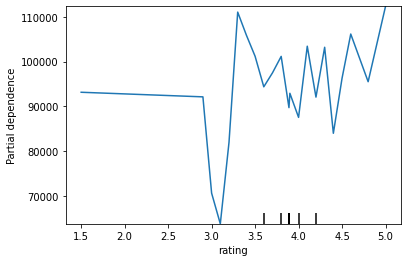

In [60]:
from matplotlib import pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

# Create and plot the data
partialdep = PartialDependenceDisplay.from_estimator(xgb_model, val_X, ['rating'])
plt.show()

In [61]:
df.head(10)

,title,company,salary,summary,date,rating,salaries,AL,CA,CT,...,NM,NY,OR,Other,RI,Remote,TN,TX,VA,WA
0,Full Stack Developer (JavaScript),"Mosaic Learning, Inc.",75000.000000,Job Title: Full Stack Developer (Javascript)De...,2.000000,3.889454,None,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,VueJS Front-end Developer,THH LLC,87500.000000,Proven work experience as a Front-end develope...,4.000000,4.300000,None,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,"Front-end developer (HTML, CSS, JavaScript)",AirTight Design,85000.000000,You will report to our lead front-end develope...,3.000000,3.889454,None,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,Remote Full Stack Javascript Developer,Sandbox Apps Inc.,54735.000000,Extending the digital shopping experience from...,12.142412,3.889454,None,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Web Developer / HTML,Phoenix Technology Partners,93620.280921,"Build applications using HTML, CSS, and JavaSc...",30.000000,3.889454,None,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,JavaScript Developer,X2logicsstaffingsolution,115000.000000,Design video and voice solutions leveraging We...,12.142412,3.889454,None,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,REMOTE Full Stack Javascript Developer,Piper Companies,122500.000000,The REMOTE Full Stack Javascript Developer wil...,3.000000,4.500000,None,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,Frontend Developer,GRANDMETRIC,101500.000000,"Our main focus is a booking system, that allow...",19.000000,3.889454,None,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,React JS Developer,TETCHTECH INC,36412.000000,"Job Types: Full-time, Part-time, Contract.Part...",7.000000,3.889454,None,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,HTML Developer,"Woongjin, Inc",93620.280921,Check the hand off for creative asset from Cli...,2.000000,3.600000,None,0,0,0,...,0,0,0,0,0,0,0,0,0,0
